# 통신사 이탈 고객 예측(Telecommunication company analysis)

## 문제상황  

A통신사는 업계 1위의 통신사였으나 그 명성이 무색해져가고 있다. 다양한 경쟁사가 등장함에 따라 M/S(시장점유율)가 떨어지고 있고, 타 통신사로의 이탈 고객이  
증가하고 있는 상황이다. 이에 이탈 가능성이 높은 고객을 예측하고, 해지 방어 활동들을 전개하려고 한다.

## 문제 해결 프로세스  

1. 문제정의

- 고객 이탈

2. 기대효과

- 고객 이탈 방어  

3. 해결방안

- 이탈 가능성 높은 고객 예측 및 해지 방어

4. 성과측정

- 이탈 가능성 높은 고객에 대해 관리 전/후 이탈률 모니터링

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/USER/Desktop/Practice Project - ML/통신사 이탈 고객 예측/통신사 이탈 고객 예측.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 결측치가 존재하지 않는다.

- 만약, 결측치가 존재했다면 전체 데이터의 약 5%정도 미만의 개수는 제거해도 좋다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, int64 or float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.

2. 데이터 타입 설명

- 종속변수는 object형태, 독립변수는 object, int64, float64형태로 구성되어 있다. 독립변수 object타입은 인코딩을 통하여 변환해줄 필요가 있어보인다.

3. 컬럼 설명

- customerID : 고객ID
- gender : 성별
- SeniorCitizen : 노인여부
- Partner : 결혼여부
- Dependents : 부양가족여부
- tenure : 회원개월수
- PhoneService : 전화서비스 여부
- MultipleLines : 다회선 여부
- PhysActivity : 인터넷 서비스 공급자
- OnlineSecurity : 온라인 보안 여부
- OnlineBackup : 온라인 백업 여부
- DeviceProtection : 기기보험 여부
- TechSupport : 기술지원 여부
- StreamingTV : 스트리밍TV 여부
- StreamingMovies : 스트리밍영화 여부
- Contract : 계약기간
- PaperlessBilling : 종이없는청구여부
- PaymentMethod : 결제수단
- MonthlyCharges : 월청구금액
- TotalCharges : 청구된 총 금액
- Churn : 이탈여부

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다.

이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다.

In [5]:
df_n = df.select_dtypes(exclude = 'object')

In [6]:
outlier = pd.melt(df_n, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier

,이상치 탐색 변수,이상치 탐색 값
0,SeniorCitizen,0.00
1,SeniorCitizen,0.00
2,SeniorCitizen,0.00
3,SeniorCitizen,0.00
4,SeniorCitizen,0.00
...,...,...
21124,MonthlyCharges,84.80
21125,MonthlyCharges,103.20
21126,MonthlyCharges,29.60
21127,MonthlyCharges,74.40


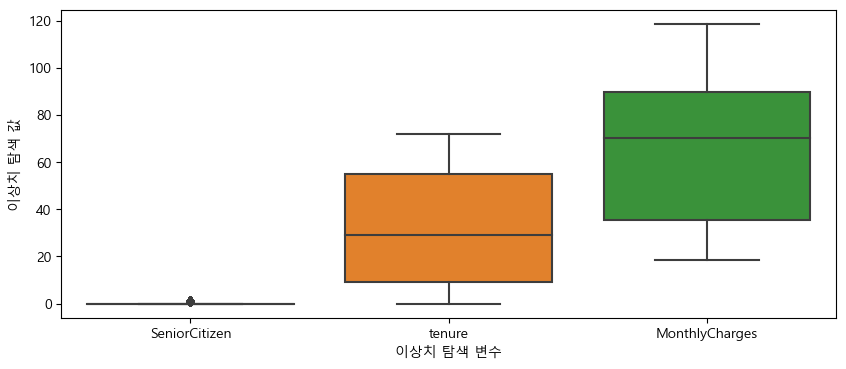

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (10,4))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier)
plt.xticks(range(3), df_n.columns)
plt.show()

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다.(예를 들어, Age 변수가 999값이 있으면 제거하거나 대체하는 것이 옳다.)

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
print("통신사 고객 이탈율 : ", (1869 / (1869 + 5174))*100)

통신사 고객 이탈율 :  26.536987079369588


In [10]:
import numpy as np
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

종속변수 object형태를 분석에 활용하기 위해 이진분류의 숫자 데이터인 0과 1로 변환해준다

### 우수고객 탐색

- 우수고객이란 이탈률이 낮은 고객군으로 설정한다

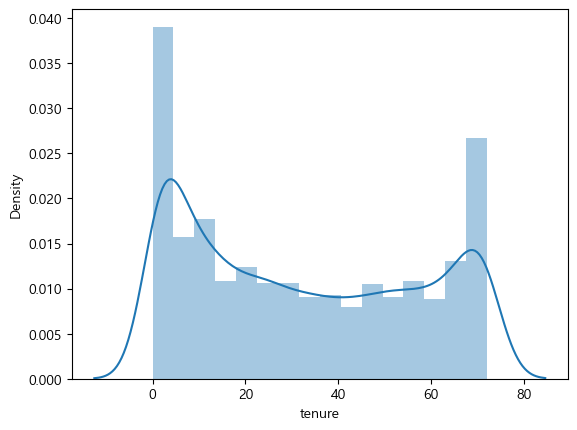

In [11]:
sns.distplot(df['tenure']);

회원개월수(tenure)의 분포를 확인한다. 우수고객 탐색을 위해 가설을 설정해본다  

가설1 : 장기고객일수록 이탈률이 낮을 것이다.

In [12]:
df['tenure_gp'] = np.where (df['tenure'] <= 20, '20 이하', 
                           np.where(df['tenure'] <= 60, '20-60 이하', '60 초과'))

df[['tenure','tenure_gp']].head(5)

,tenure,tenure_gp
0,1,20 이하
1,34,20-60 이하
2,2,20 이하
3,45,20-60 이하
4,2,20 이하


20,60 사이의 값을 평균으로 측정하고 3개의 구간으로 구간화를 진행한다

In [13]:
df_gp = df.groupby('tenure_gp')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['lift'] = round(df_gp['ratio'] / 27,1)
df_gp

,count,sum,ratio,lift
tenure_gp,,,,
20 이하,2878,1251,43.5,1.6
20-60 이하,2758,525,19.0,0.7
60 초과,1407,93,6.6,0.2


장기고객일수록 이탈률이 낮은 것을 확인할 수 있다. lift를 통해 평균 이탈률과의 차이를 한눈에 알 수 있다. 20개월 이하인 고객들은 평균 이탈률보다 무려 1.6배나 높지만, 60개월 초과인 고객들은 평균 이탈률의 약 20%밖에 되지 않는 것을 볼 수 있다

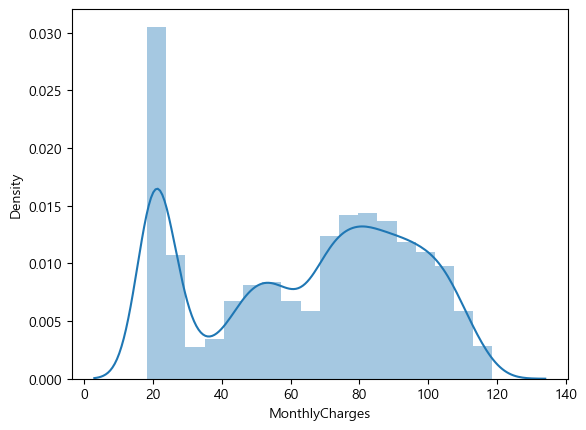

In [14]:
sns.distplot(df['MonthlyCharges']);

월청구금액(MonthlyCharges)의 분포를 확인한다. 우수고객 탐색을 위해 가설을 설정해본다

가설2 : 프리미엄 요금 회원일수록 이탈률이 낮을 것이다.

In [15]:
df['MonthlyCharges_gp'] = np.where (df['MonthlyCharges'] <= 40, '40 이하', 
                           np.where(df['MonthlyCharges'] <= 80, '40-80 이하', '80 초과'))

df[['MonthlyCharges','MonthlyCharges_gp']].head(5)

,MonthlyCharges,MonthlyCharges_gp
0,29.85,40 이하
1,56.95,40-80 이하
2,53.85,40-80 이하
3,42.30,40-80 이하
4,70.70,40-80 이하


40,80 사이의 값을 평균으로 측정하고 3개의 구간으로 구간화를 진행한다

In [16]:
df_gp = df.groupby('MonthlyCharges_gp')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['lift'] = round(df_gp['ratio'] / 27,1)
df_gp

,count,sum,ratio,lift
MonthlyCharges_gp,,,,
40 이하,1838,214,11.6,0.4
40-80 이하,2539,749,29.5,1.1
80 초과,2666,906,34.0,1.3


프리미엄 요금 회원일수록 이탈률이 높은 것을 확인할 수 있다. lift를 통해 평균 이탈률과의 차이를 한눈에 알 수 있다. 80 초과인 고객들은 평균 이탈률보다 무려 1.3배나 높지만, 40 이하인 고객들은 평균 이탈률의 약 40%밖에 되지 않는 것을 볼 수 있다  

이번 가설은 기각한다. 프리미엄 요금 회원의 혜택이 금액 대비 저조한지 혹은 다른 부담이 있는지는 파악이 되지 않지만, 오히려 저렴한 요금제를 사용하는 고객들의 이탈이 낮은 것을 알 수 있다

In [17]:
df_gp = df.groupby(['tenure_gp','MonthlyCharges_gp'])['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

count  sum  ratio
tenure_gp MonthlyCharges_gp                   
20 이하     40 이하                873  187   21.4
          40-80 이하            1300  597   45.9
          80 초과                705  467   66.2
20-60 이하  40 이하                674   26    3.9
          40-80 이하             922  140   15.2
          80 초과               1162  359   30.9
60 초과     40 이하                291    1    0.3
          40-80 이하             317   12    3.8
          80 초과                799   80   10.0

그렇다면 회원개월수 및 프리미엄 요금 회원 조합에 따른 이탈률 분석을 실시해본다. 장기고객일지라도 프리미엄 요금 회원은 이탈률이 여전히 높은 것을 확인할 수 있다. 하지만, 장기고객일수록 평균 이탈률은 낮은 것을 볼 수 있다

## 이탈 고객 특성 분석(인구통계학적 특성)

In [18]:
pd.set_option('display.max_columns', 500)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_gp,MonthlyCharges_gp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,20 이하,40 이하
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,20-60 이하,40-80 이하
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,20 이하,40-80 이하
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,20-60 이하,40-80 이하
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,20 이하,40-80 이하


In [19]:
df[['gender', 'SeniorCitizen', 'Partner', 'Dependents']].head(10)

,gender,SeniorCitizen,Partner,Dependents
0,Female,0,Yes,No
1,Male,0,No,No
2,Male,0,No,No
3,Male,0,No,No
4,Female,0,No,No
5,Female,0,No,No
6,Male,0,No,Yes
7,Female,0,No,No
8,Female,0,Yes,No
9,Male,0,No,Yes


인구통계학적 특성 : 성별/노인여부/결혼여부/부양가족여부

        count  sum  ratio  lift
gender                         
Female   3488  939   26.9   1.0
Male     3555  930   26.2   1.0


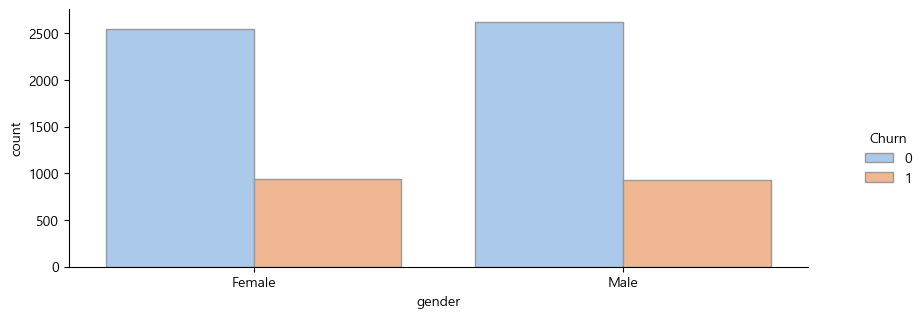

In [21]:
sns.catplot(x="gender", hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('gender')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
print(df_gp)

gender(성별)에 따른 고객 이탈률 분석을 실시한 결과, 여성 고객일수록 더욱 고객 이탈률이 높다

               count   sum  ratio  lift
SeniorCitizen                          
1               1142   476   41.7   1.6
0               5901  1393   23.6   0.9


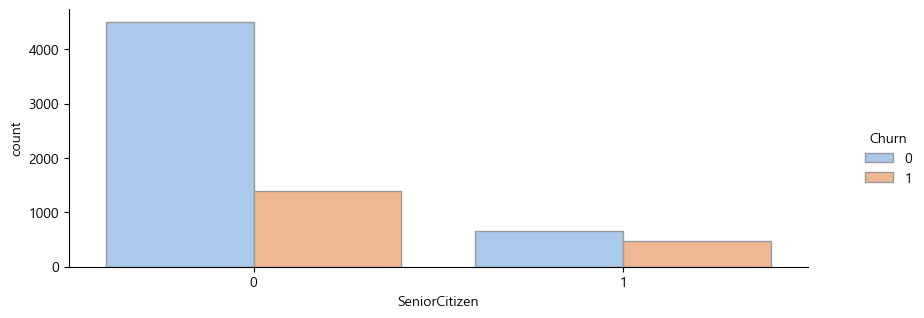

In [22]:
sns.catplot(x="SeniorCitizen", hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('SeniorCitizen')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
print(df_gp)

SeniorCitizen(노인가구여부)에 따른 고객 이탈률 분석을 실시한 결과, 노인가구일수록 더욱 고객 이탈률이 높다

         count   sum  ratio  lift
Partner                          
No        3641  1200   33.0   1.2
Yes       3402   669   19.7   0.7


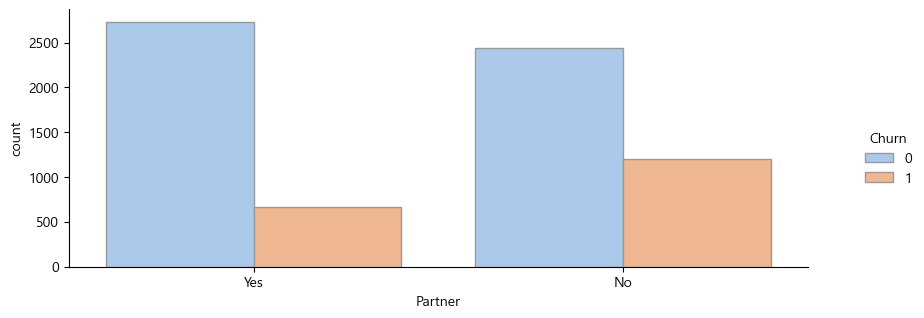

In [23]:
sns.catplot(x="Partner", hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('Partner')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
print(df_gp)

Partner(결혼여부)에 따른 고객 이탈률 분석을 실시한 결과, 결혼을 하지 않을수록 더욱 고객 이탈률이 높다

            count   sum  ratio  lift
Dependents                          
No           4933  1543   31.3   1.2
Yes          2110   326   15.5   0.6


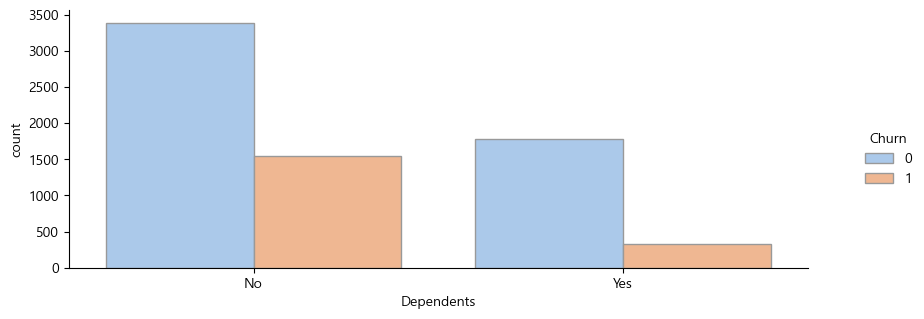

In [24]:
sns.catplot(x="Dependents", hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('Dependents')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
print(df_gp)

Dependents(부양가족 여부)에 따른 고객 이탈률 분석을 실시한 결과, 부양가족이 없을수록 더욱 고객 이탈률이 높다

## 이탈 고객 특성 분석(부가서비스 사용 )

In [25]:
df[['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Yes,No,No,No,No
1,No,Yes,No,No,No
2,Yes,No,No,No,No
3,No,Yes,Yes,No,No
4,No,No,No,No,No
...,...,...,...,...,...
7038,No,Yes,Yes,Yes,Yes
7039,Yes,Yes,No,Yes,Yes
7040,No,No,No,No,No
7041,No,No,No,No,No


부가서비스 사용 : 온락인백업서비스/기기보험서비스/기술지원서비스/스트리밍TV/스트리밍영화 서비스


                     count   sum  ratio  lift
OnlineBackup                                 
No                    3088  1233   39.9   1.5
Yes                   2429   523   21.5   0.8
No internet service   1526   113    7.4   0.3
------------------------------------------------
                     count   sum  ratio  lift
DeviceProtection                             
No                    3095  1211   39.1   1.5
Yes                   2422   545   22.5   0.8
No internet service   1526   113    7.4   0.3
------------------------------------------------
                     count   sum  ratio  lift
TechSupport                                  
No                    3473  1446   41.6   1.6
Yes                   2044   310   15.2   0.6
No internet service   1526   113    7.4   0.3
------------------------------------------------
                     count  sum  ratio  lift
StreamingTV                                 
No                    2810  942   33.5   1.3
Yes                   2707  

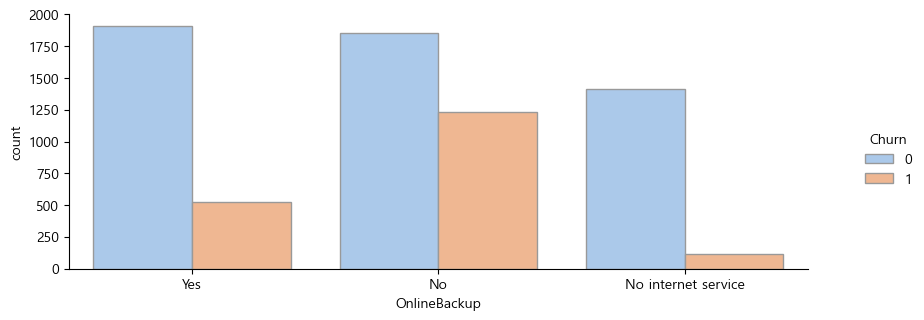

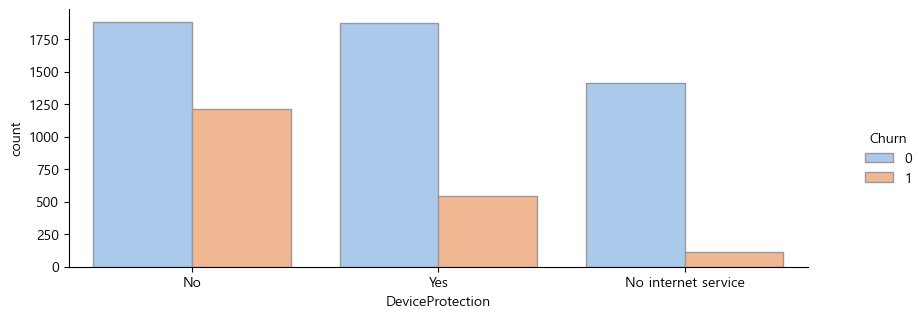

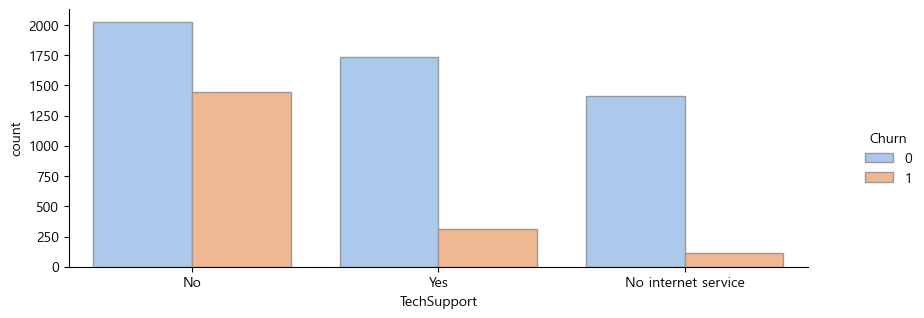

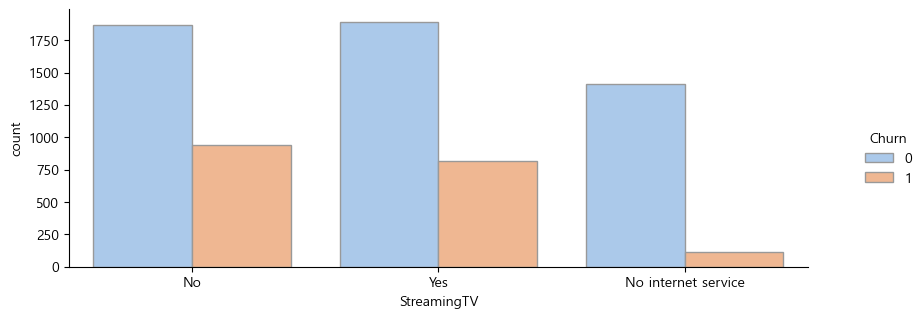

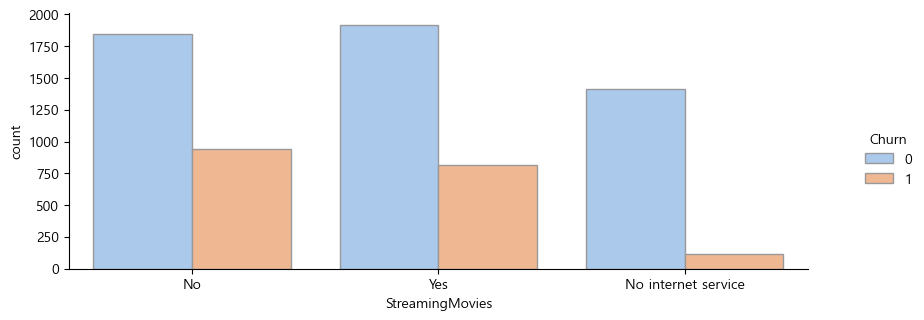

In [29]:
col_list = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in col_list :
    val = i

    sns.catplot(x=val, hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
    plt.gcf().set_size_inches(10, 3)


    df_gp = df.groupby(val)['Churn'].agg(['count','sum'])
    df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
    df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
    df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
    print(df_gp)
    print("------------------------------------------------")

부가서비스 사용(온락인백업서비스/기기보험서비스/기술지원서비스/스트리밍TV/스트리밍영화 서비스)을 하지 않는 고객들이 전부 가장 이탈율이 높은 것을 확인할 수 있다

In [27]:
df_no = df[(df['OnlineBackup'] =='No') & (df['DeviceProtection'] =='No') & (df['TechSupport'] =='No') & (df['StreamingTV'] =='No') & (df['StreamingMovies'] =='No')]
df_no[col_list]

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4,No,No,No,No,No
7,No,No,No,No,No
10,No,No,No,No,No
34,No,No,No,No,No
36,No,No,No,No,No
...,...,...,...,...,...
7026,No,No,No,No,No
7032,No,No,No,No,No
7033,No,No,No,No,No
7040,No,No,No,No,No


부가서비스를 모두 이용하지 않는 고객의 이탈률 분석을 실시해본다

In [28]:
print("부가서비스 전부 No인 고객 이탈율 : ", (df_no['Churn'].sum() / len(df_no))*100)

부가서비스 전부 No인 고객 이탈율 :  47.69585253456221


부가서비스를 모두 이용하지 않는 고객의 이탈률 분석을 실시한 결과, 평균 이탈율에 비해 거의 2배가 차이 나는 이탈율인 47.6%이다

## 이탈 고객 특성 분석(계약 형태, 요금)

In [30]:
df[['Contract', 'PaperlessBilling', 'PaymentMethod']]

,Contract,PaperlessBilling,PaymentMethod
0,Month-to-month,Yes,Electronic check
1,One year,No,Mailed check
2,Month-to-month,Yes,Mailed check
3,One year,No,Bank transfer (automatic)
4,Month-to-month,Yes,Electronic check
...,...,...,...
7038,One year,Yes,Mailed check
7039,One year,Yes,Credit card (automatic)
7040,Month-to-month,Yes,Electronic check
7041,Month-to-month,Yes,Mailed check


계약형태, 요금 : 계약기간/종이없는청구/결제수단

                count   sum  ratio  lift
Contract                                
Month-to-month   3875  1655   42.7   1.6
One year         1473   166   11.3   0.4
Two year         1695    48    2.8   0.1
------------------------------------------------
                  count   sum  ratio  lift
PaperlessBilling                          
Yes                4171  1400   33.6   1.3
No                 2872   469   16.3   0.6
------------------------------------------------
                           count   sum  ratio  lift
PaymentMethod                                      
Electronic check            2365  1071   45.3   1.7
Mailed check                1612   308   19.1   0.7
Bank transfer (automatic)   1544   258   16.7   0.6
Credit card (automatic)     1522   232   15.2   0.6
------------------------------------------------


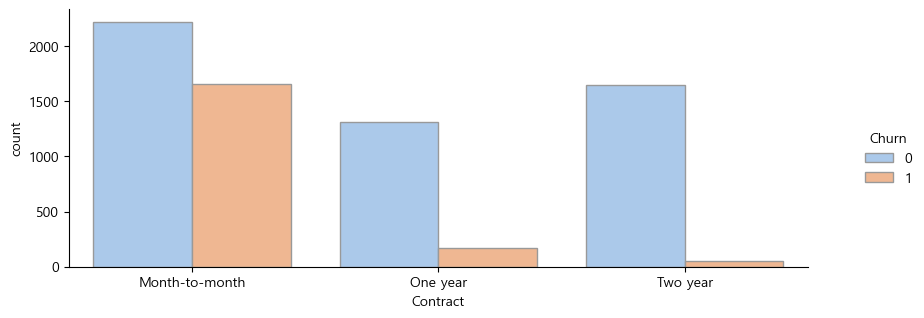

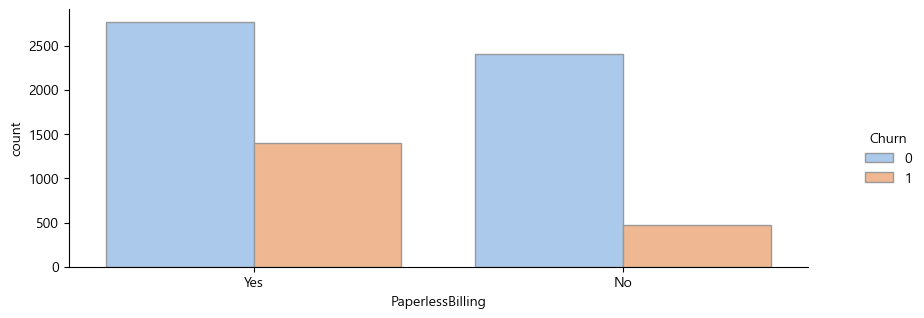

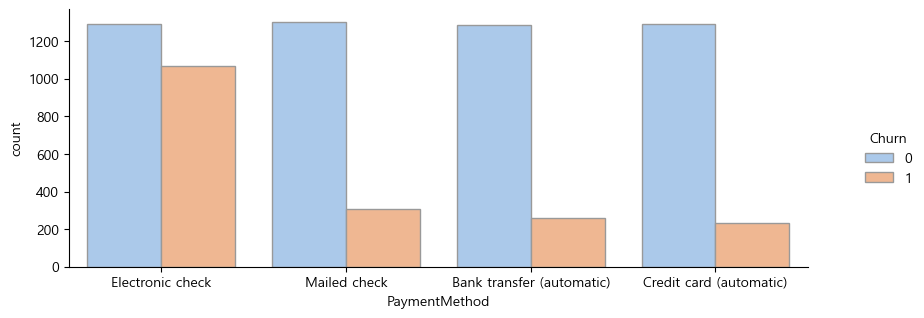

In [32]:
col_list = ['Contract', 'PaperlessBilling', 'PaymentMethod']

for i in col_list :
    val = i

    sns.catplot(x=val, hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
    plt.gcf().set_size_inches(10, 3)
    
    df_gp = df.groupby(val)['Churn'].agg(['count','sum'])
    df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
    df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
    df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
    print(df_gp)
    print("------------------------------------------------")

계약형태, 요금  

계약기간 - 월 단위  

종이없는청구 - 종이없는청구  

결제수단 - 이체크(전자수표)  

위의 고객들이 가장 이탈율이 높은 것을 확인할 수 있다

## ML 활용 이탈 고객 예측

In [34]:
numeric_list=[]
categoical_list=[]

for i in df.columns :
    if df[i].dtypes == 'O' :
        categoical_list.append(i)
    else :
        numeric_list.append(i)

print("categoical_list :", categoical_list)
print("")
print("numeric_list :", numeric_list)

categoical_list : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'tenure_gp', 'MonthlyCharges_gp']

numeric_list : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['customerID', 'tenure_gp', 'MonthlyCharges_gp', 'Churn'], axis=1)
Y=df['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4930, 19)
(4930,)
(2113, 19)
(2113,)


- 데이터 분리할 때, 분류분석은 stratify를 통해 층화추출하고 회귀분석은 동일한 비율로 나눌수가 없기 때문에 stratify 옵션을 사용하지 않는다

- 보통 데이터 행의 개수와 비슷한 차원이 있는 컬럼은 제거하고 모델링 하는 것이 좋다. 예를 들어, id 같은 것들. 각각의 값이 전부 유니크하면 제거한다

- 1개 컬럼에 모든 값이 동일하면 데이터 분리할 때 제거하는 것이 좋다

- 새로 만든 파생변수나 기존 컬럼과 동일한 의미의 컬럼들도 제거한다(단, 유의미한 변수라고 생각하면 그대로 둔다)

- 범주형 변수의 값이 3-4개가 적당하고 20개가 넘는 변수는 보통 삭제하고 모델링하는게 좋은데, 처음에는 어떤 변수가 중요한지 모르니 일단 전부 투입시키고 하는게 좋다. 이러한 경우, 범주형 변수들을 인코딩 하면 차원이 워낙 많다보니까 오류 방지 차원에서 train과 test의 값을 합쳐서 만들고 fit 시켜줘야한다

- 분석 시간이 많다 = 범주형 변수들을 하나하나 제거해보면서 모델링

- 분석 시간이 없다 = 효율성을 위해 train과 test의 값을 한번에 fit해서 모델링

In [36]:
categoical_list.remove('tenure_gp')
categoical_list.remove('MonthlyCharges_gp')
categoical_list.remove('customerID')

In [37]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges


범주형 변수는 One-hot-encoding 또는 Label-encoding을 통해 숫자형 변수로 변경해야한다. One-hot-encoding은 차원이 많은 변수에는 적절하지 않고, Label-encoding은 차원이 많은 변수에 유용하기 때문에 Label-encoding을 진행한다

In [38]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state = 2023, max_depth=4, n_estimators=1000)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3622
           1       0.74      0.36      0.49      1308

    accuracy                           0.80      4930
   macro avg       0.77      0.66      0.68      4930
weighted avg       0.79      0.80      0.77      4930

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1552
           1       0.69      0.34      0.45       561

    accuracy                           0.78      2113
   macro avg       0.74      0.64      0.66      2113
weighted avg       0.77      0.78      0.76      2113



1. precision  

- 통신사 이탈할 것 같은 고객들을 예측한 고객들 중에서 실제로 통신사 이탈한 고객의 확률

- 장점 : 최대한 많은 통신사 이탈 고객들을 후보리스트로 만들어서 관리가 가능하며, 고객 이탈 방어가 가능하다.

- 단점 : 실제로 그렇지 않은 고객들이 포함될 수 있다.


2. recall  

- 실제로 통신사 이탈한 고객들중에서 통신사 이탈 예측을 맞춘 확률

- 장점 : 실제로 통신사 이탈할것같은 고객들만 관리할 수 있다.

- 단점 : 통신사 이탈 고객들이 적어서 모수가 작아지기 때문에 고객 이탈 방어 효과가 나타나지 않을 수 있다.

3. support

- 561명 중에 약 190명을 맞춰서 recall 값이 0.34값이 나왔다

- y_pred_test 1의 값인 274명중에 약 190명이 존재한다는 의미이다(recall)

- 561명 중에 274명이 예측된 고객. 274명 중에 69%인 약 190명이 실제 이탈한 고객의 수(precision)

In [39]:
pd.Series(y_pred_test).value_counts()

0    1839
1     274
dtype: int64

In [40]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1] 
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1] 


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8534082619466157
roc_score_test : 0.8347385697484242


4. roc_auc_score

- 이진 분류기의 성능을 평가할때 사용하는 지표로 100에 가까울 수록 모델 성능이 좋은 것이라고 할 수 있다.

- 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 것이다.

- 여기서도 train과 test의 roc_score값이 차이가 거의 없으므로 과적합이 발생하지 않았다

- 85에 가까운 값이 나온 것은 좋은 모델이라고 할 수 있다.

5. predict

- 0과 1로 나누는 것(0.5 이하는 0, 초과는 1)

6. predict_proba

- 0일 확률과 1일 확률로 나누는 것

In [41]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')
  
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot에서 임곗값에 따른 FPR, TPR 값을 반환 받는다  

- FPR : 실제로는 음성인 데이터 중에서 분류기가 음성이 아니라 양성이라고 판별한 데이터의 비율(1 - 민감도)

- TPR : recall

- roc curve를 plot 곡선으로 그린다

- 가운데 대각선 직선을 그린다(기준선)

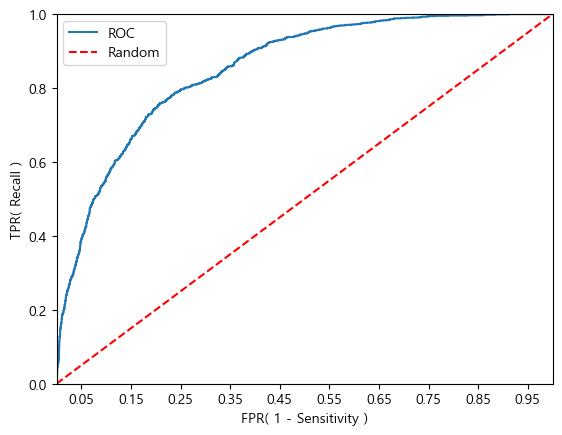

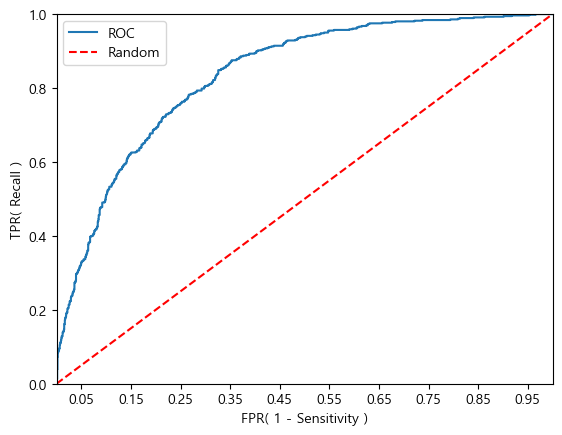

In [42]:
roc_curve_plot(y_train, y_pred_train_proba)
roc_curve_plot(y_test, y_pred_test_proba)

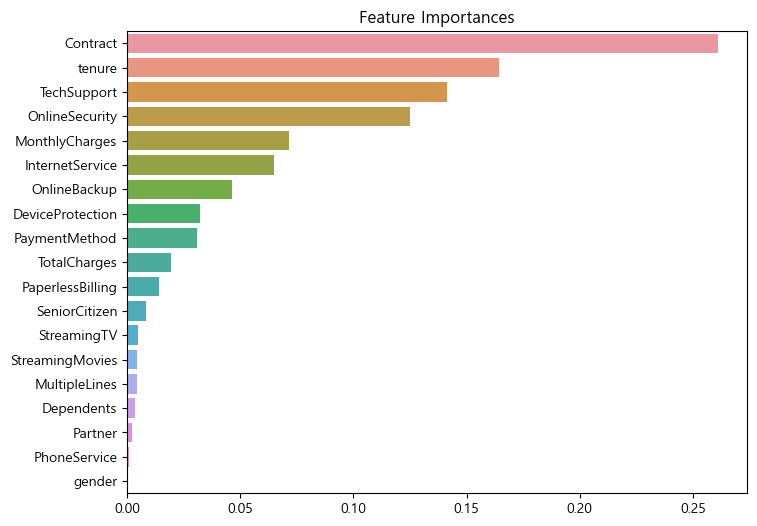

In [43]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:31]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

Feature IMP 분석을 통해 중요변수를 파악한다. 위의 상위 변수들을 살펴보면, Contract(계약기간)가 통신사 이탈 고객을 예측하는데 가장 중요한 변수임을 확인할 수 있다. 따라서 Contract(계약기간)를 주의 깊게 살펴가면서 예측을 진행하는 것이 좋은 판단이다

SeniorCitizen부터 하위 변수들은 제거하고 다시 모델링 해보는 것도 좋다

                count   sum  ratio  lift
Contract                                
Month-to-month   3875  1655   42.7   1.6
One year         1473   166   11.3   0.4
Two year         1695    48    2.8   0.1


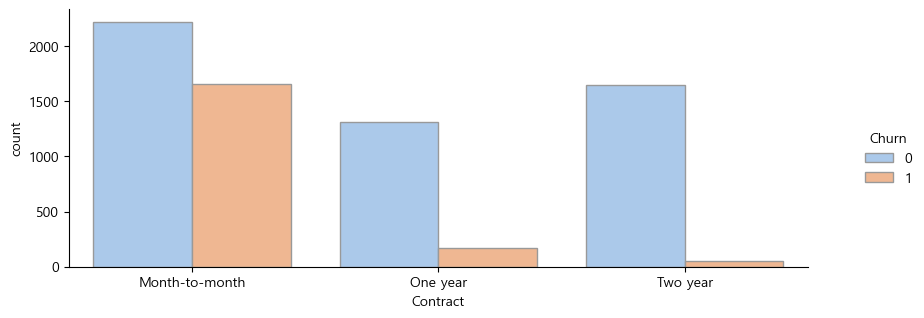

In [46]:
sns.catplot(x='Contract', hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('Contract')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
print(df_gp)

가장 중요한 변수에 대해 상세한 탐색을 실시한 결과, 계약기간이 짧을수록 고객 이탈율이 높아지는 것을 확인할 수 있다. 계약기간이 가장 짧은 경우, 무려 42.7%의 고객 이탈율을 가지고 있으므로 가장 중요한 변수임을 알 수 있다

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 통신사 이탈 고객들을 기반으로 이탈 가능성이 높은 고객에 대해 관리 전/후 이탈율 모니터링을 통해 비교하는것이다.

ex) 통신사 이탈 예측 고객 = Contract가 월 단위인 고객들(계약기간이 짧은 고객들)